<a href="https://colab.research.google.com/github/DianaFerreiraSantos/previsao-resistencia-concreto/blob/main/RID221303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dados_concreto - Sheet1.csv to dados_concreto - Sheet1 (1).csv


In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('dados_concreto - Sheet1.csv')

In [27]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


1 - Quais fatores estão mais associados à resistência do concreto?

In [29]:
matriz_correlacao = df.corr(numeric_only=True)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

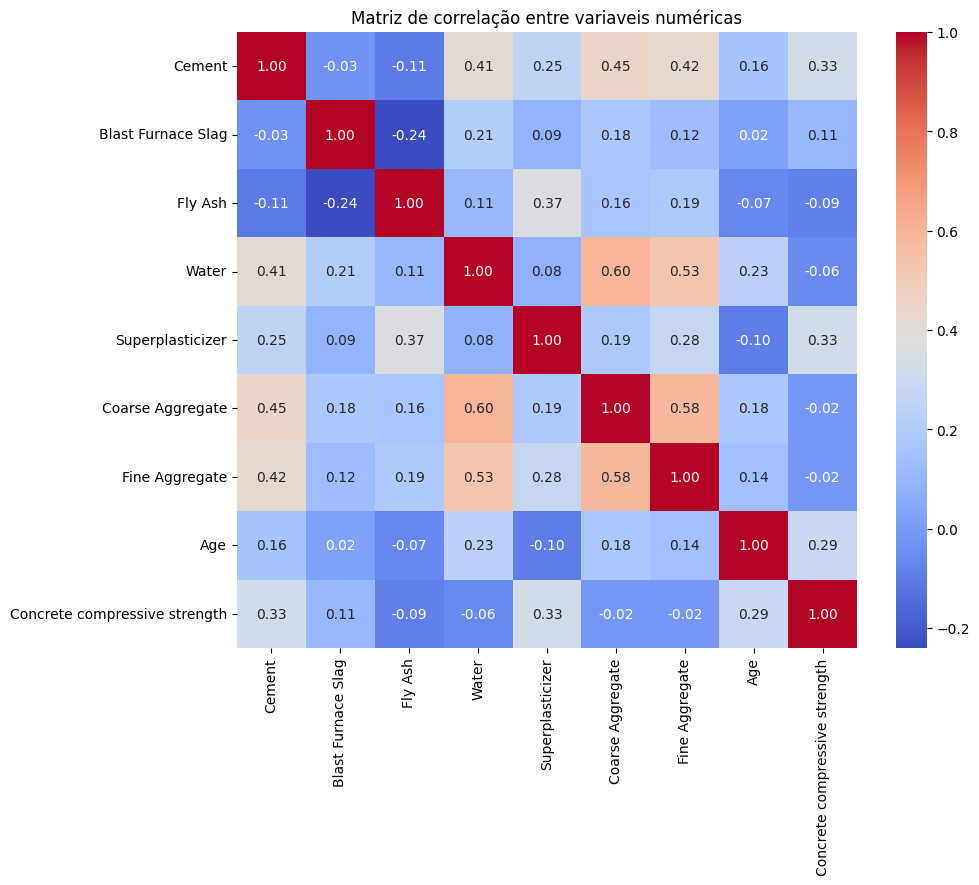

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação entre variaveis numéricas')
plt.show()

concrete comprenssive strenght - cement = correlaçao positiva (0.33) /  concrete comprenssive strenght - water = correlaçao negativa (-0.06)

2 -Como a quantidade de cimento afeta a resistência do concreto?

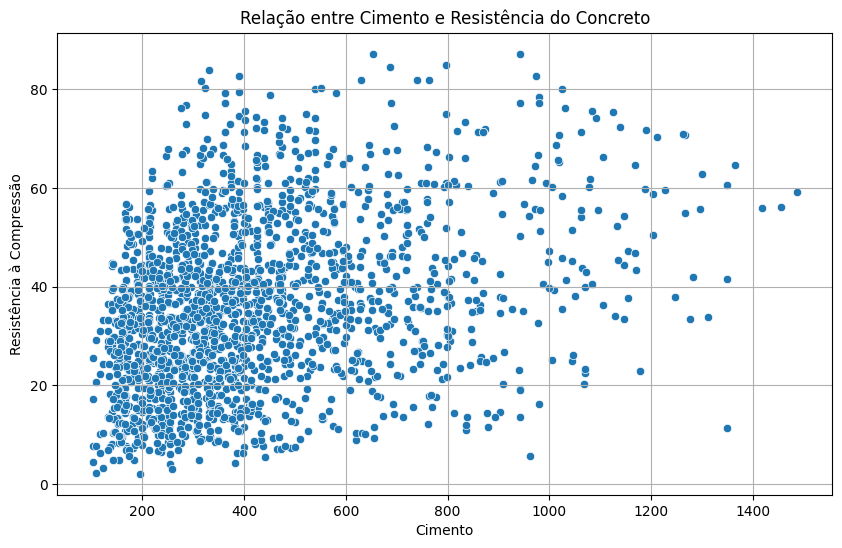

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength')
plt.title('Relação entre Cimento e Resistência do Concreto')
plt.xlabel('Cimento')
plt.ylabel('Resistência à Compressão')
plt.grid(True)
plt.show()

In [ ]:
3 - Como a água afeta a resistência do concreto?

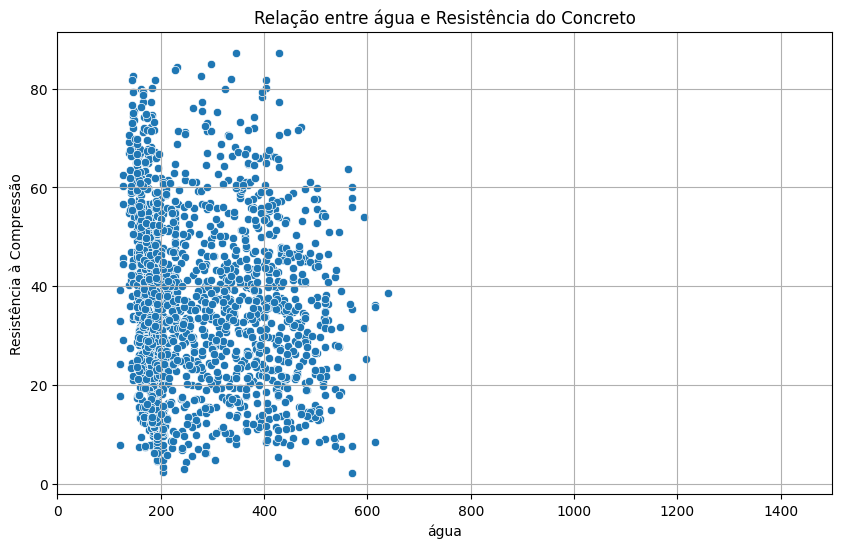

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water', y='Concrete compressive strength')
plt.title('Relação entre água e Resistência do Concreto')
plt.xlabel('água')
plt.ylabel('Resistência à Compressão')
plt.grid(True)
plt.xlim(0, 1500)
plt.show()

In [ ]:
4 - Qual é a resistência média do concreto por categoria de força?

In [20]:
media_por_categoria = df.groupby('Strength Category')['Concrete compressive strength'].mean()

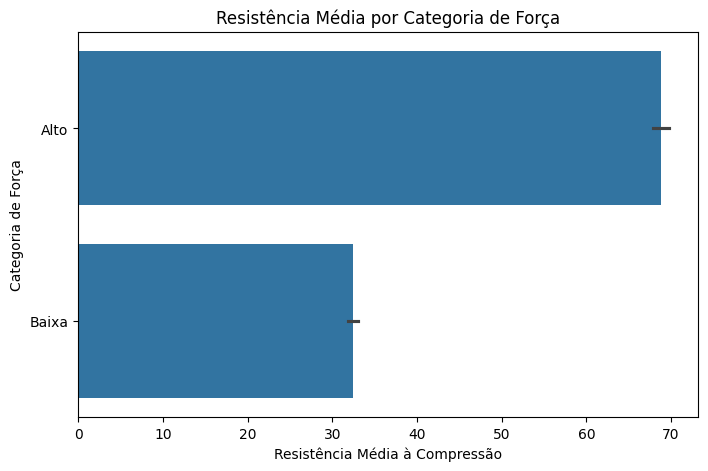

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Concrete compressive strength', y='Strength Category')
plt.title('Resistência Média por Categoria de Força')
plt.xlabel('Resistência Média à Compressão')
plt.ylabel('Categoria de Força')
plt.show()

In [24]:
df['Strength Category'].value_counts()

,count
Strength Category,
Baixa,1840
Alto,189


In [25]:
df['Strength Category'].unique()

array(['Alto', 'Baixa'], dtype=object)

In [ ]:
Verificar a qualidade dos dados

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [40]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,9
Strength Category,0


In [43]:
df.dropna(subset=['Concrete compressive strength'], inplace=True)

In [44]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0
Strength Category,0


Codificar variáveis categóricas:

In [50]:
df_encoded = pd.get_dummies(df, columns=['Strength Category'])

In [46]:
print(df_encoded.columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category_Alto',
       'Strength Category_Baixa'],
      dtype='object')


In [48]:
df_encoded.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category_Alto,Strength Category_Baixa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,True,False
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,True,False
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,False,True
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,False,True
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,False,True


In [51]:
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})


In [52]:
df_encoded.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category_Alto,Strength Category_Baixa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,1,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,1,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,0,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,0,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,0,1


Modelo de Regressão

In [53]:
df_encoded.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category_Alto',
       'Strength Category_Baixa'],
      dtype='object')

In [58]:
##variavel alvo

In [59]:
y = df_encoded['Concrete compressive strength']


In [ ]:
##variaveis de entrada - features

In [60]:
X = df_encoded[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                'Coarse Aggregate', 'Fine Aggregate', 'Age']]

In [ ]:
##conjunto de treino e teste (80/20)

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf_modelo = RandomForestRegressor(random_state=42)
rf_modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
y_pred_rf = rf_modelo.predict(X_test)

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error

In [74]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'R2 - Random Forest: {r2_rf:.2f}')
print(f'MAE - Random Forest: {mae_rf:.2f}')

R2 - Random Forest: 0.78
MAE - Random Forest: 5.43


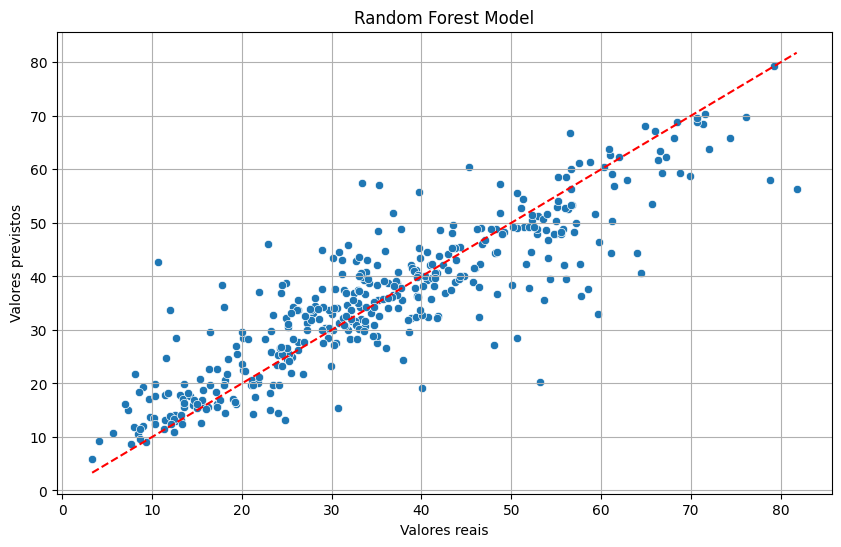

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Random Forest Model')
plt.grid(True)
plt.show()

Modelo de Regressão Linear

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr_modelo = LinearRegression()
lr_modelo.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred_lr = lr_modelo.predict(X_test)

In [94]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'R2 - Regressão Linear: {r2_lr:.2f}')
print(f'MAE - Regressão Linear: {mae_lr:.2f}')

R2 - Regressão Linear: 0.37
MAE - Regressão Linear: 10.37


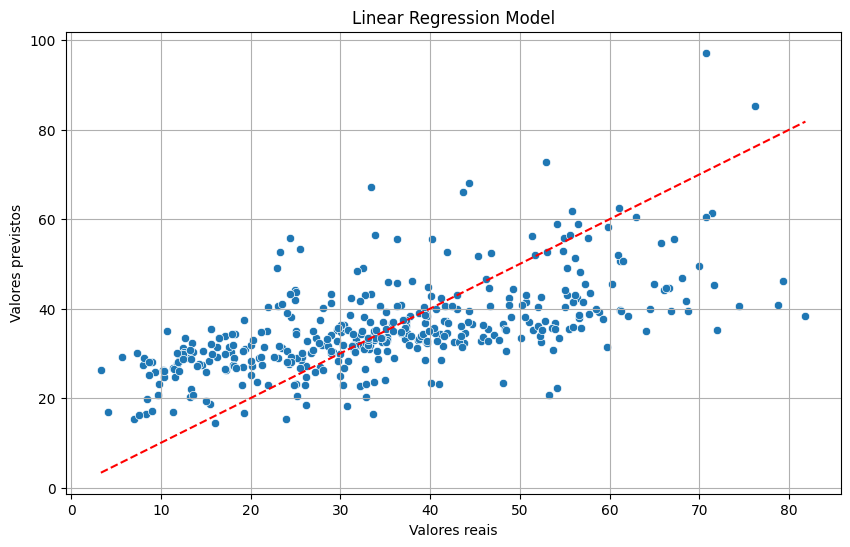

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()

In [100]:
## Rendom Forest Model

print(f'R2 - Random Forest: {r2_rf:.2f}')
print(f'MAE - Random Forest: {mae_rf:.2f}')

R2 - Random Forest: 0.78
MAE - Random Forest: 5.43


In [99]:
#Linear Regression Model

print(f'R2 - Regressão Linear: {r2_lr:.2f}')
print(f'MAE - Regressão Linear: {mae_lr:.2f}')

R2 - Regressão Linear: 0.37
MAE - Regressão Linear: 10.37


In [105]:
resultados finais = {
    'Modelo': ['Random Forest', 'Regressão Linear'],
    'R2': [0.78, 0.37],
    'MAE': [5.43, 10.37]
}

In [104]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,R²,MAE
0,Random Forest,0.78,5.43
1,Regressão Linear,0.37,10.37


Neste caso o modelo Random Forest é o mais adequado pois como podemos ver, a métrica R2 o desempenho foi de 78% enquando que para a RL foi apenas 37%; e , para a métrica MAE podemos ver que para a RL temos aproximadamente o dobro do valor do que no RF. Quanto mais alta for a R2 melhor e quando mais baixa for a MAE melhor.

In [114]:
previsao_novos_dados = pd.DataFrame({
    'Cement': [550],
    'Blast Furnace Slag': [150],
    'Fly Ash': [0],
    'Water': [180],
    'Superplasticizer': [2.5],
    'Coarse Aggregate': [1000],
    'Fine Aggregate': [700],
    'Age': [25]
})

In [121]:
previsao = rf_modelo.predict(previsao_novos_dados)
print(f'Resistência do concreto (previsão): {previsao[0]:.2f}')

Resistência do concreto (previsão): 53.75
